Otw kerjain jam 5.

In [1]:
import sys
import platform
print(f'Was run on:\n{sys.version}\n{platform.platform()}')

Was run on:
3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Windows-10-10.0.22631-SP0


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import geopandas as gpd
import os
from PIL import Image
import seaborn as sns
import matplotlib.animation as animation

from sklearn.preprocessing import MinMaxScaler
import category_encoders

## PreProcessing

In [3]:
# Import Dataset
df = pd.read_csv("../Data/Data Produksi Beras Sumatera.csv")
columns = df.columns

# Check for missing value
df.isna().sum()     # No mising value

# Show 6 most front rows
df.head(6)

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31
5,Aceh,1998,1404580.0,365892.0,1465.0,82.60,26.84


Data merupakan data geospasial Time Series (Data Panel) yang mencakup informasi output produksi beras, luas panen, curah hujan, kelembapan, dan suhu rata-rata. Dataset sendiri tidak memiliki missing value sehingga tidak perlu adanya penanganan.

In [4]:
# Check type of each column
df.dtypes

# Get unique of each Province
provs = df["Provinsi"].unique()
provs

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung'], dtype=object)

Data ini hanya mencakup lokasi 'Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', dan 'Lampung'

In [5]:
# Check for duplicated
df.duplicated().sum()       # None

# Check each `Tahun` of each `provinsi
for prov in provs:
    temp = df[df["Provinsi"]==prov]["Tahun"]
    print((f'{prov:18}: {temp.min()}-{temp.max()}'))

Aceh              : 1993-2020
Sumatera Utara    : 1993-2020
Sumatera Barat    : 1993-2020
Riau              : 1993-2020
Jambi             : 1993-2020
Sumatera Selatan  : 1993-2020
Bengkulu          : 1993-2020
Lampung           : 1993-2020


Seluruh Data provinsi bermulai dari 1993 hinga 2020.

In [6]:
# Transformation
# Scale [Luas Panen, Curah hujan, Kelembapan, Suhu rata-rata]
scaler = MinMaxScaler()
temp=df.iloc[:,2:]

df_scaled = df.copy()
df_scaled.iloc[:,2:]=temp

## Eksplorasi

In [7]:
def formatter(x, pos):
    if x >= 1e6:
        return str(round(x / 1e6, 1)) + " Juta"
    return x

Provinsi Pulau Sumatera penghasil beras terbanyak (Pie Chart) 2020

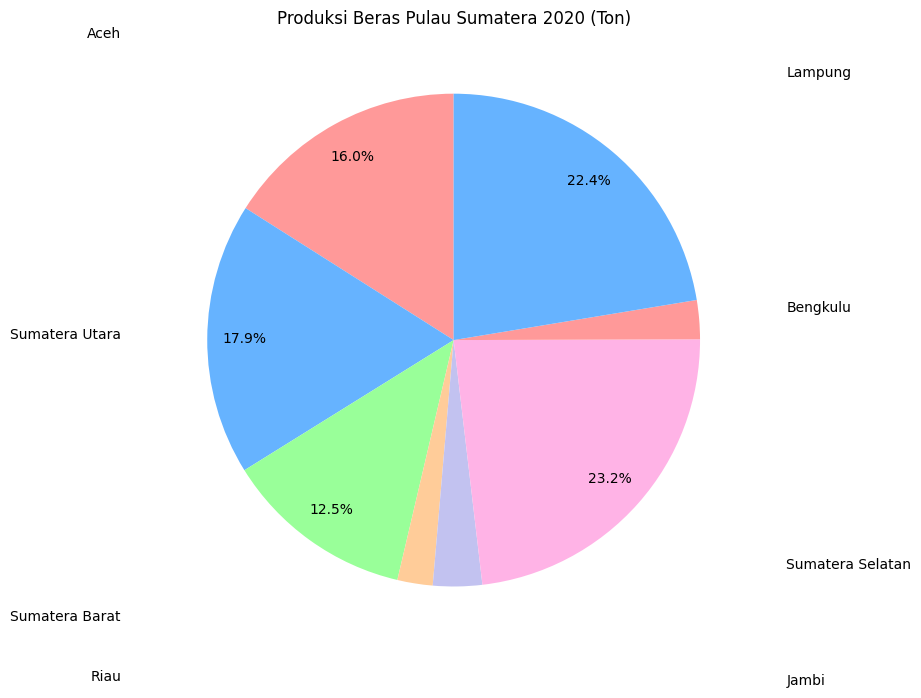

In [8]:
def custom_autopct(pct):
    return f'{pct:.1f}%' if pct > 5 else ''

temp_df = df[df["Tahun"]==2020]
labels = temp_df["Provinsi"]
sizes  = temp_df["Produksi"]

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=custom_autopct,
                                  startangle=90, pctdistance=0.85)

# Add annotations
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"

    ax.annotate(label, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment)

plt.title("Produksi Beras Pulau Sumatera 2020 (Ton)")
ax.set_aspect('equal')
plt.show()

Provinsi Lampung beras terbanyak pada tahun 2020, namun bagaimana dengan tahun-tahun sebelumnya?

In [10]:
# # Ada di historyProduksi.py
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from matplotlib.ticker import NullFormatter

# def formatter(x, pos):
#     if x >= 1e6:
#         return str(round(x / 1e6, 1)) + " Juta"
#     return x

# years = np.array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 
#                   2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
#                   2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

# produksi = np.array([1646900.00, 1615751.00, 1943709.00, 1971740.00, 1753656.00, 1975700.00, 
#                      1801422.00, 1946406.00, 1992726.00, 1951109.00, 1966293.00, 2091996.00, 
#                      2124144.00, 2129914.00, 2308404.00, 2341075.00, 2673844.00, 2807676.00, 
#                      2940795.00, 3101455.00, 3207002.00, 3320064.00, 3641895.00, 3831923.00, 
#                      4090654.00, 2488641.91, 2164089.33, 2604913.29])

# fig, ax = plt.subplots()
# ax.set_xlim(years.min(), years.max())
# ax.set_ylim(produksi.min(), produksi.max())
# ax.set_xlabel('Year')
# ax.set_ylabel('Produksi')
# ax.set_title('Produksi Beras (Ton) di Provinsi Lampung')
# plt.grid(True, alpha=0.3)

# line, = ax.plot([], [], lw=2)
# ax.yaxis.set_major_formatter(formatter)
# ax.yaxis.set_minor_formatter(NullFormatter())

# # Initialization function for the animation
# def init():
#     line.set_data([], [])
#     return line,

# # Animation function, updating the plot
# def update(frame):
#     x_data = years[:frame]
#     y_data = produksi[:frame]
#     line.set_data(x_data, y_data)
    
#     # Determine the color of the line based on trend
#     if frame > 1:
#         # Check if the trend is increasing or decreasing
#         if y_data[-1] >= y_data[-2]:
#             line.set_color('green')
#         else:
#             line.set_color('red')
    
#     return line,

# # Create the animation
# ani = FuncAnimation(fig, update, frames=len(years), init_func=init, blit=True, interval=500)

# plt.show()

<img src="../Output/produksi_animation.gif" width="500" align="center">

Melihat Trend masing-masing provinsi pada setiap peubah

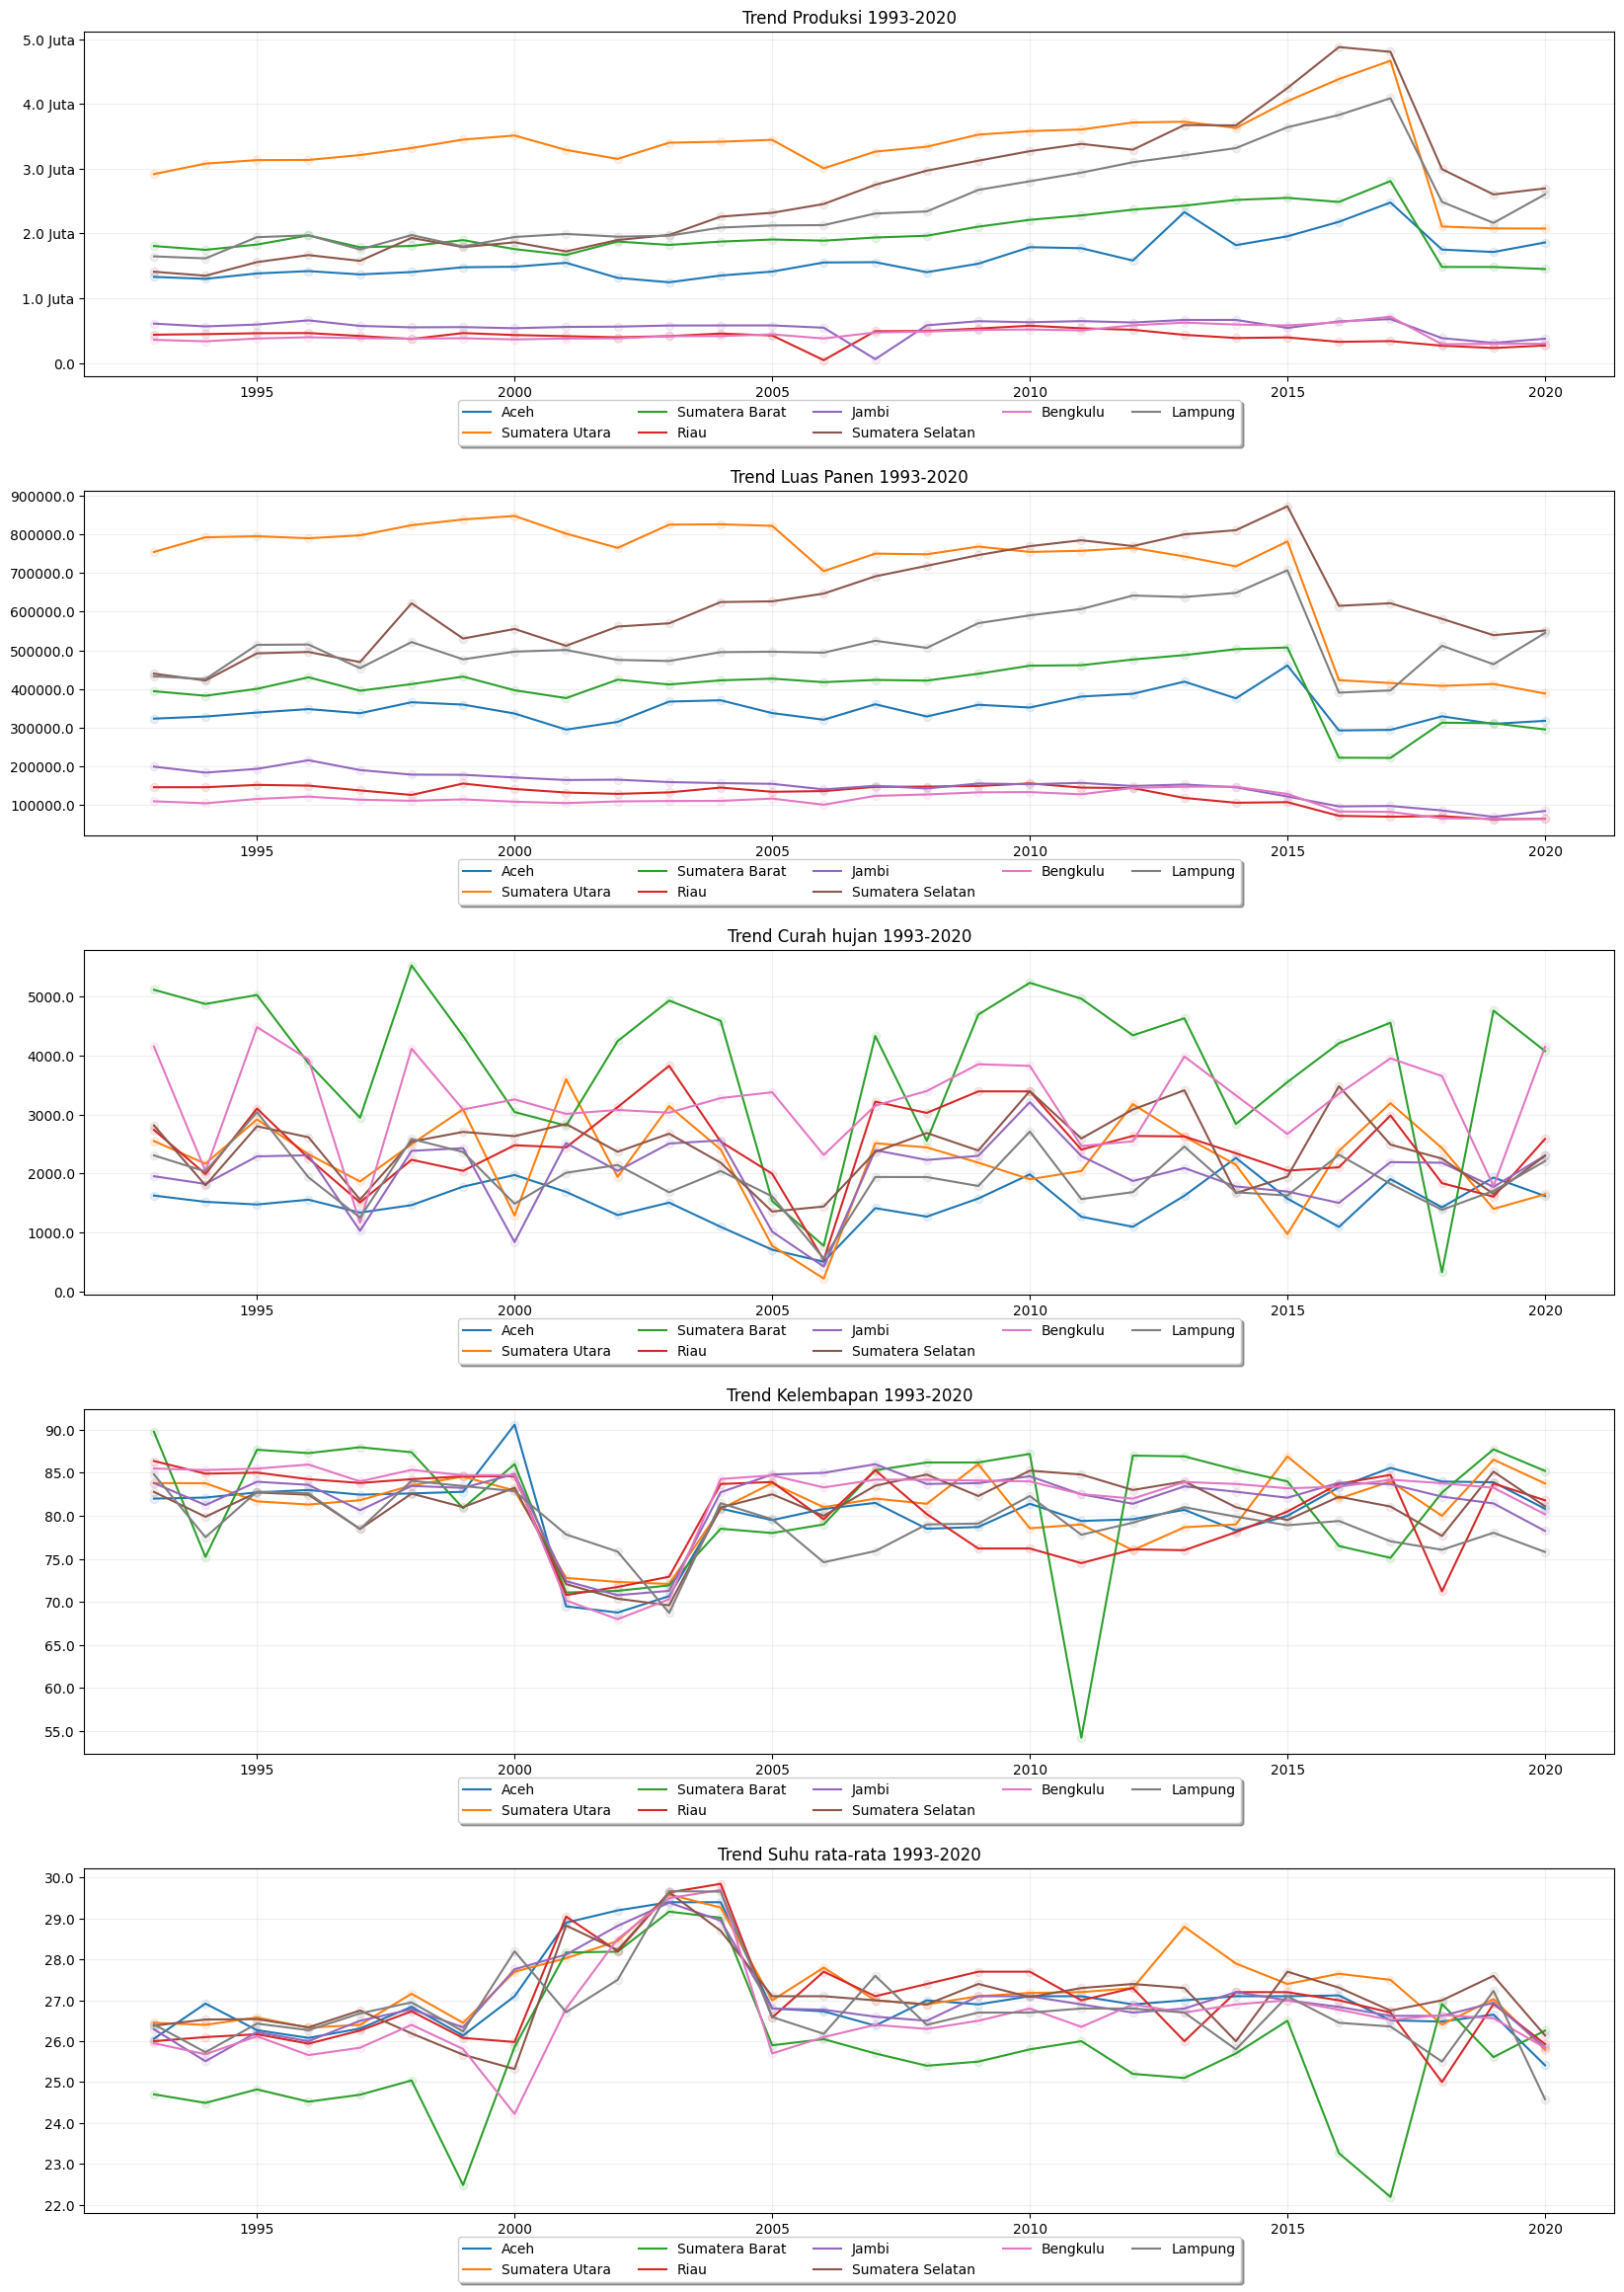

In [12]:
fig = plt.figure(figsize=(20,35))
fig.subplots_adjust(0.125, 0.125, 0.9, 0.9,1)
for iter, column in enumerate(columns[2:]):
    ax = fig.add_subplot(len(columns[2:])+1, 1, iter+1)
    ax.grid("on", alpha=0.2)
    ax.set_title(f'Trend {column} 1993-2020')
    for prov in provs:
        temp = df[df["Provinsi"] == prov]
        ax.plot(temp["Tahun"].values, temp[column].values, label=prov)
        ax.scatter(temp["Tahun"].values, temp[column].values, alpha=0.1)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.10,
                    box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
             fancybox=True, shadow=True, ncol=5)
    
    ax.yaxis.set_major_formatter(formatter)
    ax.yaxis.set_minor_formatter(NullFormatter())

Boxplot Seluruh Peubah Per Tahun

In [ ]:
for year in df["Tahun"].unique():
    fig = plt.figure(figsize=(20, 10))
    fig.subplots_adjust(0.125, 0.125, 0.9, 0.2,9)
    for i, column in enumerate(df.columns[2:]):
        ax = fig.add_subplot(1, len(df.columns[2:]), i + 1)
        sns.boxplot(y=df[df["Tahun"]==year][column], color='gray', orient='v')
        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.set_minor_formatter(NullFormatter())
    fig.suptitle(f"Pulau Sumatera Tahun {year}")
    plt.tight_layout()
    fig.show()
        # Save PNG
    if os.path.exists(f"../Output/Boxplot"):
        fig.savefig(f"../Output/Boxplot/{year}", bbox_inches = 'tight')
    else:
        os.makedirs(f"../Output/Boxplot")

# Save GIF
image_folder = f'../Output/Boxplot/'
images = [Image.open(os.path.join(image_folder, filename)) for filename in sorted(os.listdir(image_folder), key=len)]

output_path = f'../Output/!Boxplot.gif'

images[0].save(output_path,
            save_all=True,
            append_images=images,
            duration=1000,  # Duration in milliseconds per frame (0.5s = 500ms)
            loop=0)  # Loop forever

<img src="../Output/!Boxplot.gif" width="750" align="center">

Matriks Korelasi

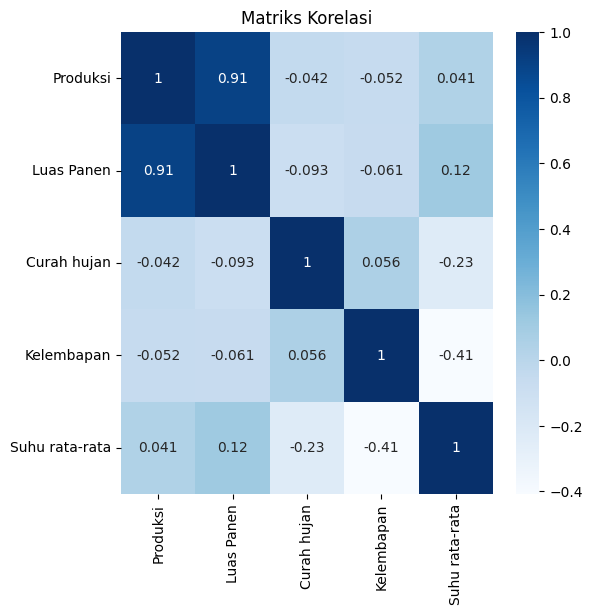

In [14]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.iloc[:,2:].corr(), annot=True, cmap='Blues')
plt.title('Matriks Korelasi')
plt.show()

Visualisasi Choropleth pulau Sumatera setiap peubah (GIF)


<Axes: >

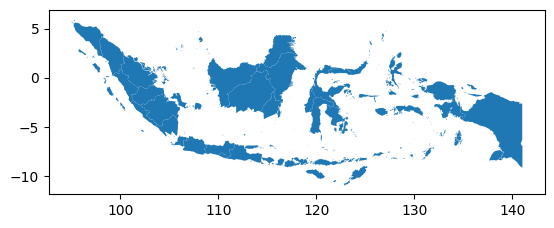

In [11]:
map_df = gpd.read_file("../Data/idn_admbnda_adm1_bps_20200401.shp")

map_df.plot()

Data shape terdiri dari seluruh provinsi, ambil provinsi yang berada pada data saja.

In [62]:
# Check bila penulisan provnsi sesuai
for i in df["Provinsi"].unique():
    print(i, i in map_df["ADM1_EN"].unique())   #Aman
    
# Ambil provinsi yang berada pada df saja
temp = pd.DataFrame()
for i in df["Provinsi"]:
    temp = pd.concat((temp, map_df[map_df["ADM1_EN"]==i]))
temp = temp.drop_duplicates()
#temp.plot()

Aceh True
Sumatera Utara True
Sumatera Barat True
Riau True
Jambi True
Sumatera Selatan True
Bengkulu True
Lampung True


In [ ]:
Merged_mapDf = temp.set_index("ADM1_EN").join(df.set_index("Provinsi"))
colours = ["BrBG_r", "BrBG", "BuGn", "BuGn_r", "BuPu"]
for colour, column in zip(colours, columns[2:]):
    temp = Merged_mapDf[column]
    vmin = temp.min()
    vmax = temp.max()
    for i, year in enumerate(df["Tahun"].unique()):
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.axis("off")
        fig.set_facecolor("#ffffff")
        fig.patch.set_facecolor("#ffffff")
        ax.axis("off")
        ax.margins(0)
        ax.apply_aspect()
        temp_df = Merged_mapDf[Merged_mapDf["Tahun"]==year]
        temp_df.plot(column = column, cmap=colour, linewidth=0.3, ax=ax, edgecolor='0.8')
        cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=colour, norm=plt.Normalize(vmin=vmin, vmax=vmax)), orientation="vertical", aspect=40, shrink=0.9, pad=0.02)
        cbar.ax.tick_params(labelsize=6)

        ax.annotate(f'{column} Pulau Sumatera di Tahun {year}',
                xy=(0.4, 1.1), xycoords='figure fraction',
                horizontalalignment='center', verticalalignment='center',
                fontsize=14, color='#555555')
        if column == "Produksi":
            ax.annotate('Ton',
                    xy=(0.75, 0.93), xycoords='figure fraction',
                    horizontalalignment='right', verticalalignment='bottom',
                    fontsize=8, color='#555555')
        elif column == "Luas Panen":
            ax.annotate('Hektar',
                    xy=(0.75, 0.93), xycoords='figure fraction',
                    horizontalalignment='right', verticalalignment='bottom',
                    fontsize=8, color='#555555')
        elif column == "Curah hujan":
            ax.annotate('mm',
                    xy=(0.75, 0.93), xycoords='figure fraction',
                    horizontalalignment='right', verticalalignment='bottom',
                    fontsize=8, color='#555555')
        elif column == "Kelembapan":
            ax.annotate('RF',
                    xy=(0.75, 0.93), xycoords='figure fraction',
                    horizontalalignment='right', verticalalignment='bottom',
                    fontsize=8, color='#555555')
        elif column == "Suhu rata-rata":
            ax.annotate('°C',
                    xy=(0.75, 0.93), xycoords='figure fraction',
                    horizontalalignment='right', verticalalignment='bottom',
                    fontsize=8, color='#555555')

        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.set_minor_formatter(NullFormatter())
        
        # Save PNG
        if os.path.exists(f"../Output/{column}"):
            fig.savefig(f"../Output/{column}/{i}", bbox_inches = 'tight')
        else:
            os.makedirs(f"../Output/{column}")
    
    # Save GIF
    image_folder = f'../Output/{column}/'
    images = [Image.open(os.path.join(image_folder, filename)) for filename in sorted(os.listdir(image_folder), key=len)]

    output_path = f'../Output/{column}.gif'
    
    images[0].save(output_path,
                save_all=True,
                append_images=images,
                duration=500,  # Duration in milliseconds per frame (0.5s = 500ms)
                loop=0)  # Loop forever

<img src="../Output/Curah hujan.gif" width="250" align="center">
<img src="../Output/Kelembapan.gif" width="250" align="center">
<img src="../Output/Luas Panen.gif" width="250" align="center">
<img src="../Output/Produksi.gif" width="250" align="center">
<img src="../Output/Suhu rata-rata.gif" width="250" align="center">

## Prediction Model

### 1. Pendekata Time Series

1. Vector autoregression per Provinsi seluruh peubah

https://repository.ipb.ac.id/handle/123456789/79119

Persyaratan:

    1. Minimal 50 amatan per variable 

    2. Stasioner dalam rataan dan ragam

Tidak memenuhi

2. LSTM tanpa per provinsi untuk memprediksi total produksi beras

Tidak memenugi, jumlah amatan per provinsi sangat sedikit

### 2. Pendekatan Machine Learning dalam memprediksi Total Produksi Beras dengan menghiraukan waktu

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3717879

In [265]:
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xg 
from tensorflow import keras

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [30]:
# One hots encoder
encoder = category_encoders.OneHotEncoder(cols="Provinsi")
encoder.fit(df_scaled)
df_scaled_Encoded = encoder.transform(df_scaled)
df_scaled_Encoded.pop("Tahun")
# data params
X = df_scaled_Encoded.copy()
y = X.pop("Produksi")
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
def accuracy_test(model):
    train_predicted = model.predict(train_X)
    test_predicted = model.predict(test_X)
    return pd.DataFrame(data=[[r2_score(train_y, train_predicted), round(sqrt(mean_squared_error(train_y, train_predicted)), 2)], 
                              [r2_score(test_y, test_predicted), round(sqrt(mean_squared_error(test_y, test_predicted)), 2)]], 
                        index=["Train", "Test"],columns=["R2score", "RMSE"])

1. Decision Tree

In [199]:
dtree = DecisionTreeRegressor()
dtree.fit(train_X, train_y)

accuracy_test(dtree)

,R2score,RMSE
Train,1.000000,0.00
Test,0.958662,191175.61


2. Random forest

In [214]:
rf = RandomForestRegressor()
rf.fit(train_X, train_y)

accuracy_test(rf)

,R2score,RMSE
Train,0.971698,202307.80
Test,0.935669,238489.58


3. Extra trees

In [237]:
et = ExtraTreesRegressor()
et.fit(train_X, train_y)

accuracy_test(et)

,R2score,RMSE
Train,1.000000,0.00
Test,0.965311,175128.16


4. XGBoost

In [279]:
xgb_r = xg.XGBRegressor()
xgb_r.fit(train_X, train_y)

accuracy_test(xgb_r)

,R2score,RMSE
Train,1.000000,419.33
Test,0.943935,222639.55


5. ANN

In [ ]:
#CONST
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# Adjust performance and turn it into a tf.dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_X, train_y)).cache().batch(BATCH_SIZE).prefetch(AUTOTUNE)

def get_model():
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(128, "linear"),
        keras.layers.Dense(1, "relu"),
    ])
    model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MSE, metrics=keras.metrics.MAE)
    
    return model

model = get_model()
model.fit(train_ds, epochs=1000)

In [282]:
accuracy_test(model)

2/2 [==============================] - 0s 2ms/step


,R2score,RMSE
Train,0.813302,519603.42
Test,0.856292,356449.40
